<a href="https://colab.research.google.com/github/Mwadz/KNN-and-The-Naive-Bayes-Classifier/blob/Native-Bayes/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>**Objectives**</font>

> To implemented the most appropriate Naïve Bayes Classifier following the best practices of optimization. 
These include:
* feature selection
* splitting the data into subsets to use in modeling.

> To interpret the feature selection done and models created.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

spam = pd.read_csv('/content/spambase.csv')

In [3]:
spam.head(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [4]:
spam.shape

(4600, 58)

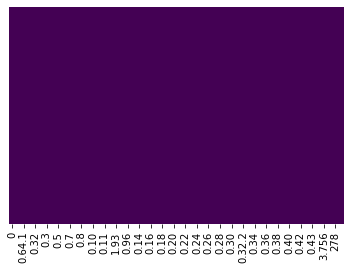

In [5]:
# Checking for missing values
sns.heatmap(spam.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [6]:
# checking for duplicate reccords
spam.duplicated().sum()

391

In [7]:
# dropping the duplicates
spam.drop_duplicates(keep=False, inplace=True)
# confirming
spam.duplicated().sum()

0

In [8]:
# cheking datatypes
spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4029 non-null   float64
 1   0.64    4029 non-null   float64
 2   0.64.1  4029 non-null   float64
 3   0.1     4029 non-null   float64
 4   0.32    4029 non-null   float64
 5   0.2     4029 non-null   float64
 6   0.3     4029 non-null   float64
 7   0.4     4029 non-null   float64
 8   0.5     4029 non-null   float64
 9   0.6     4029 non-null   float64
 10  0.7     4029 non-null   float64
 11  0.64.2  4029 non-null   float64
 12  0.8     4029 non-null   float64
 13  0.9     4029 non-null   float64
 14  0.10    4029 non-null   float64
 15  0.32.1  4029 non-null   float64
 16  0.11    4029 non-null   float64
 17  1.29    4029 non-null   float64
 18  1.93    4029 non-null   float64
 19  0.12    4029 non-null   float64
 20  0.96    4029 non-null   float64
 21  0.13    4029 non-null   float64
 22  

In [9]:
# checking the column names
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt


In [15]:
!pip install heatmapz


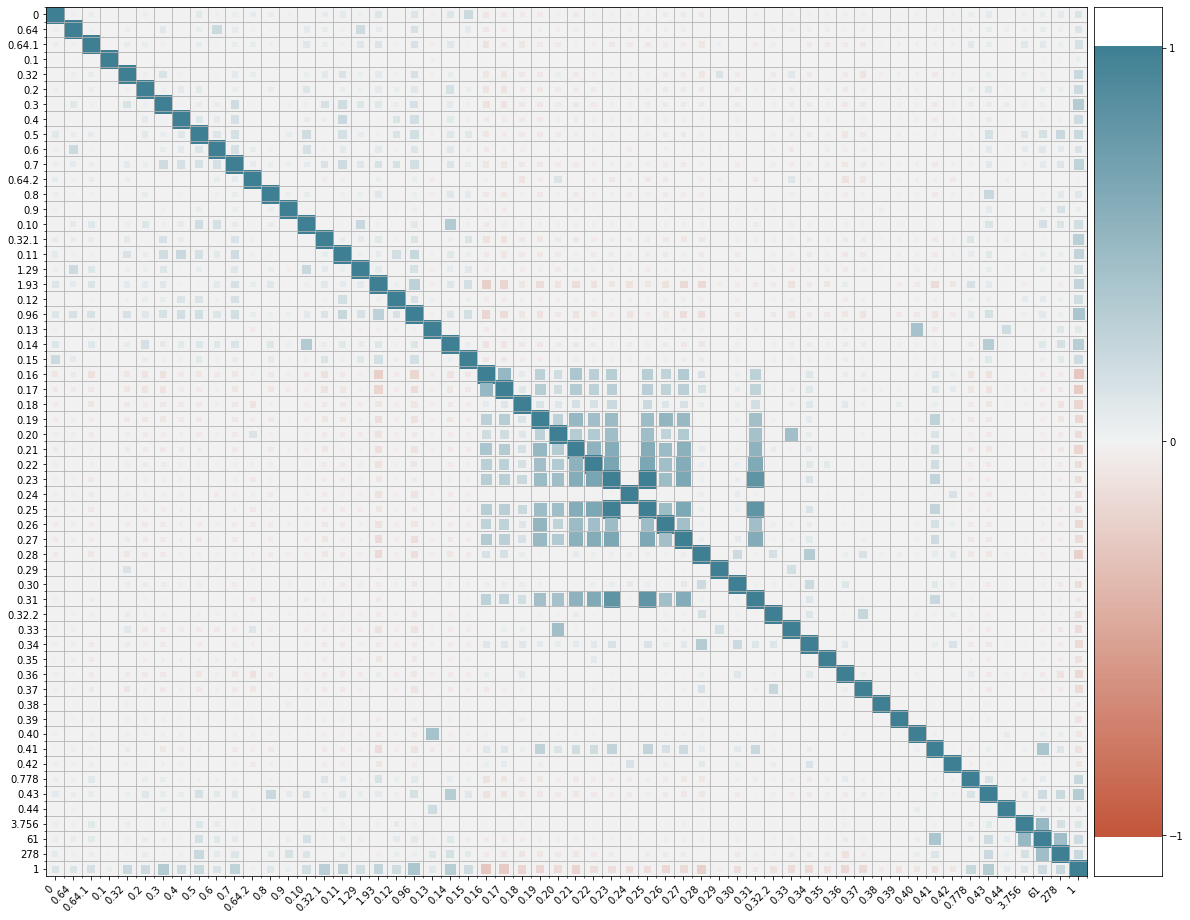

In [19]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(20, 16))
corrplot(spam.corr(), size_scale=300);

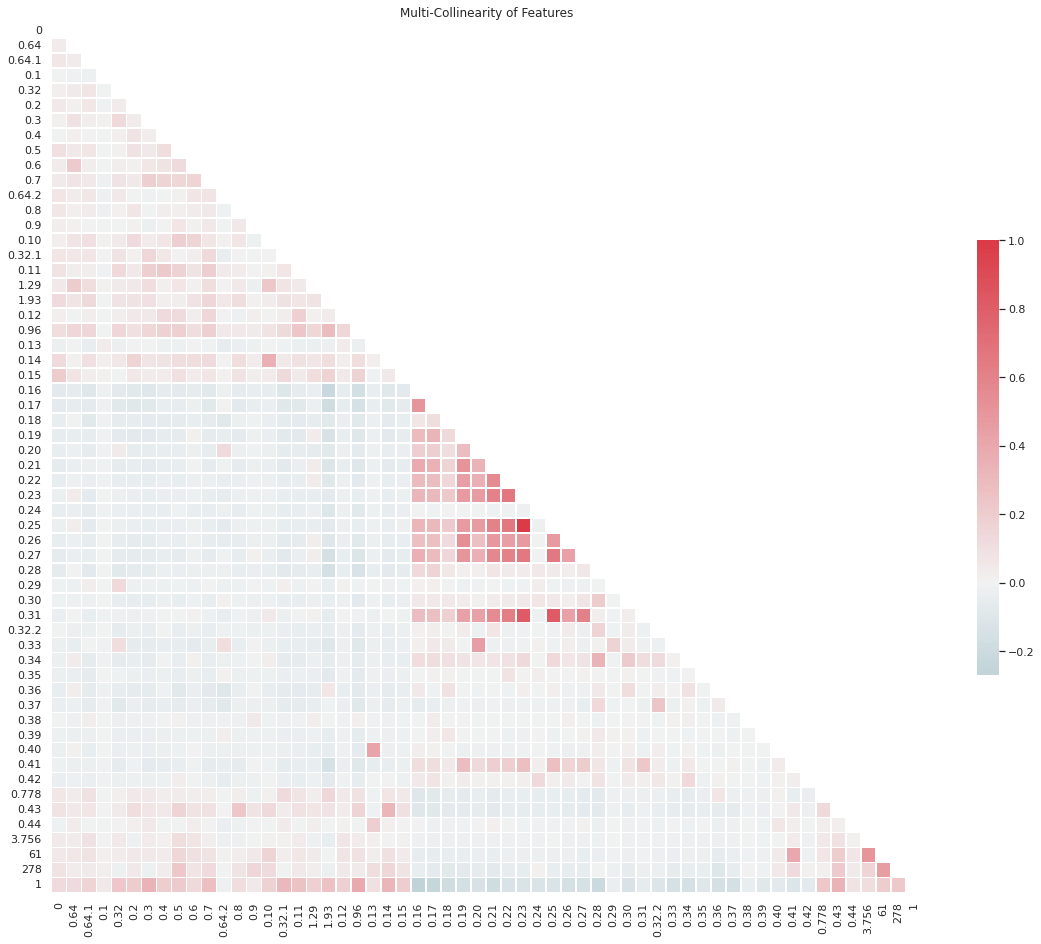

In [22]:
#@title Multicollinearity
sns.set(style="whitegrid")
# Create a covariance matrix
corr = spam.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,16))
# Draw the heatmap with the mask and correct aspect ratio
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features');

###<font color = 'orange'>Sidenote</font>

update it by running the following commands.

> git branch -m main Native-Bayes

> git fetch origin

> git branch -u origin/Native-Bayes Native-Bayes

> git remote set-head origin -a